<a href="https://colab.research.google.com/github/Kishan-Sinha/Annual_Tea_Yield_Predictor/blob/main/Data_preprocessing_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing pandas for data handling

import pandas as pd

df = pd.read_excel('/content/sample_data/tea_data.xlsx')

df

,Area,Green leafs,Yield
0,4.0,37301.0,2145.0
1,5.2,60539.0,2678.0
2,3.6,30974.0,1979.0
3,6.2,56258.0,2086.0
4,3.5,25111.0,1650.0
...,...,...,...
199,3.6,37668.0,2407.0
200,3.4,30680.0,2075.0
201,8.2,90239.0,2531.0
202,7.7,51004.0,1523.0


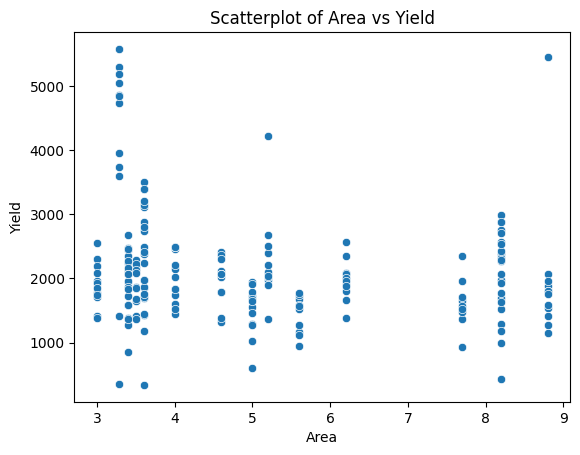

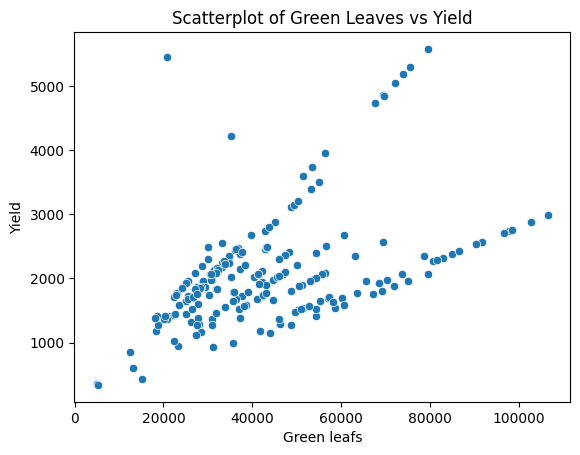

In [ ]:
## DATA VISUALIZATION ##

# Checking relation between "Area" vs "Yield" and "Green leafs" vs "Yield"

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Area', y='Yield', data=df)
plt.title('Scatterplot of Area vs Yield')
plt.show()

sns.scatterplot(x='Green leafs', y='Yield', data=df)
plt.title('Scatterplot of Green Leaves vs Yield')
plt.show()

****We can see a linear relation between yield and green leafs, but the bandwidth is not ideal ****

****Since total areas and their respective produce (green leaf amount) is given, so it only makes sense to make a new column for observing the produce per unit area****

In [ ]:
### FEATURE ENGINEERING ###

# creating a new column by dividing "Green Leafs" by "Area"

df['leafs p/a'] = df['Green leafs'] / df['Area']

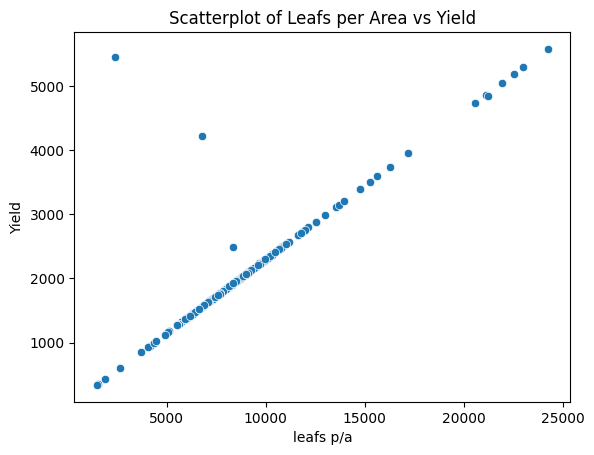

In [ ]:
# Plotting scatter graph for "leafs p/a" vs "yield"

import matplotlib.pyplot as plt
sns.scatterplot(x='leafs p/a', y='Yield', data=df)
plt.title('Scatterplot of Leafs per Area vs Yield')
plt.show()

**As it can be seen that the improvised column is almost perfectly related with the output column (yield)**

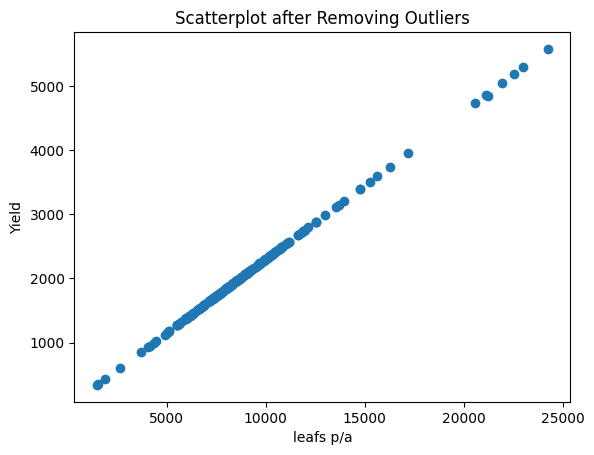

In [ ]:
### OUTLIER HANDLING ###

# Filtering outliers in the scatter plot by manually setting the limit

df_cleaned = df[~(((df['leafs p/a'] < 9000) & (df['Yield'] > 2400)))]

# Plotting again to confirm

plt.scatter(df_cleaned['leafs p/a'], df_cleaned['Yield'])
plt.xlabel('leafs p/a')
plt.ylabel('Yield')
plt.title('Scatterplot after Removing Outliers')

plt.show()


In [ ]:
# Checking for missing values

df_cleaned[df_cleaned.isna().any(axis =1)]

,Area,Green leafs,Yield,leafs p/a
90,5.6,NaN,NaN,NaN


**Since it is only a single instance with multiple missing values, so we decide on removing it**

In [ ]:
# Dropping the row containing NAN values

df_cleaned = df_cleaned.dropna()

In [ ]:
# Scaling the independent variable for faster convergence

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Reshape the 'leafs p/a' column to be a 2D array

leafs_pa_reshaped = df_cleaned['leafs p/a'].values.reshape(-1, 1)

# Apply StandardScaler

df_cleaned['leafs p/a_scaled'] = scaler.fit_transform(leafs_pa_reshaped)

df_cleaned.head()

,Area,Green leafs,Yield,leafs p/a,leafs p/a_scaled
0,4.0,37301.0,2145.0,9325.250000,0.120724
1,5.2,60539.0,2678.0,11642.115385,0.774517
2,3.6,30974.0,1979.0,8603.888889,-0.082835
3,6.2,56258.0,2086.0,9073.870968,0.049788
4,3.5,25111.0,1650.0,7174.571429,-0.486172


In [ ]:
# Dropping all columns except the key variable "leafs p/a scaled" and "yield"

df_cleaned = df_cleaned.drop(columns=['Area', 'Green leafs', 'leafs p/a'])

df_cleaned

,Yield,leafs p/a_scaled
0,2145.0,0.120724
1,2678.0,0.774517
2,1979.0,-0.082835
3,2086.0,0.049788
4,1650.0,-0.486172
...,...,...
199,2407.0,0.441878
200,2075.0,0.035582
201,2531.0,0.594662
202,1523.0,-0.641567


In [ ]:
# saving the final processed data set

df_cleaned.to_csv('processed_tea_data.csv', index=False)

In [ ]:
# saving the fitted scaler for future use

import joblib

joblib.dump(scaler, "standard_scaler.pkl")

['standard_scaler.pkl']

**The above created dataset will be further used for model building**